## Observations and Insights 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import statsmodels.api as sm

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [2]:
# Combine the data into a single dataset
mergeDf = pd.merge(mouse_metadata, study_results, on = ["Mouse ID"])
mergeDf

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice in the DataFrame.
print(mouse_metadata["Mouse ID"].count())
print(study_results.groupby(["Timepoint", "Mouse ID"]).count())
len(mergeDf)

249
                    Tumor Volume (mm3)  Metastatic Sites
Timepoint Mouse ID                                      
0         a203                       1                 1
          a251                       1                 1
          a262                       1                 1
          a275                       1                 1
          a366                       1                 1
...                                ...               ...
45        y865                       1                 1
          z578                       1                 1
          z581                       1                 1
          z795                       1                 1
          z969                       1                 1

[1888 rows x 2 columns]


1893

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
cleanDf = mergeDf.sort_values(["Mouse ID", "Timepoint"])
cleanDf

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
454,a203,Infubinol,Female,20,23,0,45.000000,0
455,a203,Infubinol,Female,20,23,5,48.508468,0
456,a203,Infubinol,Female,20,23,10,51.852437,1
457,a203,Infubinol,Female,20,23,15,52.777870,1
458,a203,Infubinol,Female,20,23,20,55.173336,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleanDf.drop_duplicates(keep=False,inplace=True)
cleanDf

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
454,a203,Infubinol,Female,20,23,0,45.000000,0
455,a203,Infubinol,Female,20,23,5,48.508468,0
456,a203,Infubinol,Female,20,23,10,51.852437,1
457,a203,Infubinol,Female,20,23,15,52.777870,1
458,a203,Infubinol,Female,20,23,20,55.173336,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
print(mergeDf["Mouse ID"].count())
print(cleanDf["Mouse ID"].count())

1893
1891


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
meanTumorVol = cleanDf.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
medianTumorVol = cleanDf.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
varTumorVol = cleanDf.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
stDevTumorVol = cleanDf.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
semTumorVol = cleanDf.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

summaryStats = pd.DataFrame({"AverageTumorVol": meanTumorVol,
                             "MedianTumorVol": medianTumorVol,
                             "VarianceTumorVol": varTumorVol,
                             "StandardDeviationTumorVol": stDevTumorVol,
                             "StandardErrMeanTumorVol": semTumorVol})
summaryStats
# This method is the most straightforward, creating multiple series and putting them all together at the end.

,AverageTumorVol,MedianTumorVol,VarianceTumorVol,StandardDeviationTumorVol,StandardErrMeanTumorVol
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.414660,50.965298,42.199890,6.496144,0.515178
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
cleanDf.groupby(["Drug Regimen"]).describe()["Tumor Volume (mm3)"]
# This method produces everything in a single groupby function.

,count,mean,std,min,25%,50%,75%,max
Drug Regimen,,,,,,,,
Capomulin,230.0,40.675741,4.994774,23.343598,37.685933,41.557809,45.000000,48.158209
Ceftamin,178.0,52.591172,6.268188,45.000000,47.208427,51.776157,56.801438,68.923185
Infubinol,178.0,52.884795,6.567243,36.321346,47.312353,51.820584,57.314444,72.226731
Ketapril,188.0,55.235638,8.279709,45.000000,48.232987,53.698743,60.870951,78.567014
Naftisol,186.0,54.331565,8.134708,45.000000,47.285874,52.509285,59.963034,76.668817
Placebo,181.0,54.033581,7.821003,45.000000,47.459053,52.288934,59.916934,73.212939
Propriva,159.0,52.414660,6.496144,45.000000,47.131825,50.965298,56.334942,72.455421
Ramicane,228.0,40.216745,4.846308,22.050126,36.674635,40.673236,45.000000,47.622816
Stelasyn,181.0,54.233149,7.710419,45.000000,48.047139,52.431737,58.719297,75.123690


## Bar Plots

Text(0.5, 0, 'Number of Mice')

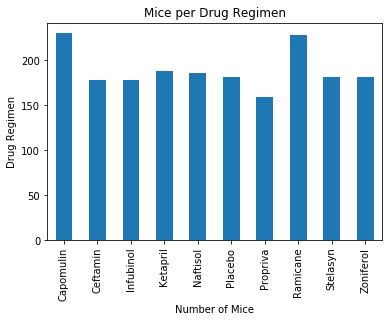

In [10]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
mouseCount = cleanDf.groupby(["Drug Regimen"]).count()["Mouse ID"]
mouseCount.plot(x ='Drug Regimen', y='Mouse ID', kind = 'bar')
plt.title("Mice per Drug Regimen")
plt.ylabel("Drug Regimen")
plt.xlabel("Number of Mice")

## Pie Plots

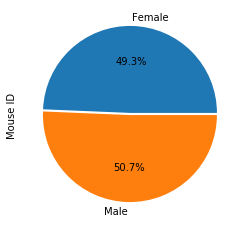

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
explode = (0.025, 0)

mouseGender = cleanDf.groupby(["Sex"]).count()["Mouse ID"]
mouseGender.plot(x ='Sex', y='Mouse ID', kind = 'pie', autopct="%1.1f%%", explode = explode)

## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
#Ramicane, Capomulin, Infubinol, Propriva

In [13]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and Scatter Plots

What mouse would you like to look at?g316


Text(0.5, 0, 'Timepoint')

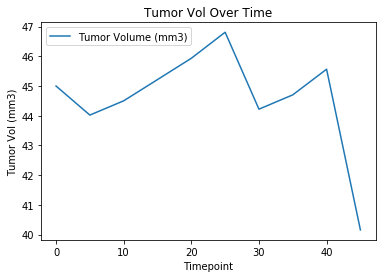

In [14]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
mouseId = input("What mouse would you like to look at?")
#(b128, b742, f966, g288, g316, i557 were all given Capomulin)
drugDf =cleanDf.loc[(cleanDf["Drug Regimen"] == "Capomulin") &
                    (cleanDf["Mouse ID"] == mouseId)]
drugDf.plot(x ='Timepoint', y='Tumor Volume (mm3)', kind = 'line')
plt.title("Tumor Vol Over Time")
plt.ylabel("Tumor Vol (mm3)")
plt.xlabel("Timepoint")

Text(0.5, 0, 'Mouse Weight')

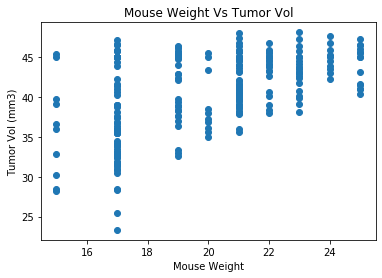

In [15]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
tumorDf = cleanDf.loc[(cleanDf["Drug Regimen"] == "Capomulin")]
plt.scatter(tumorDf["Weight (g)"], tumorDf["Tumor Volume (mm3)"])
plt.title("Mouse Weight Vs Tumor Vol")
plt.ylabel("Tumor Vol (mm3)")
plt.xlabel("Mouse Weight")

## Correlation and Regression

The correlation between mouse weight and tumor volume is 0.65


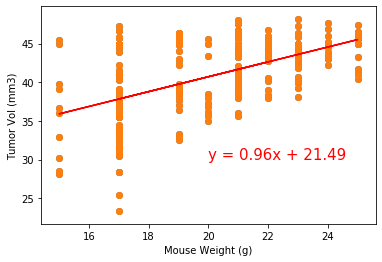

In [16]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
mouseWeight = cleanDf.iloc[:,5]
tumorVol = cleanDf.iloc[:,7]
correlation = st.pearsonr(mouseWeight, tumorVol)
print(f"The correlation between mouse weight and tumor volume is {round(correlation[0],2)}")

plt.scatter(tumorDf["Weight (g)"], tumorDf["Tumor Volume (mm3)"])

x_values = tumorDf["Weight (g)"]
y_values = tumorDf["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,30),fontsize=15,color="red")
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Tumor Vol (mm3)')
plt.show()

In [17]:
X = cleanDf["Weight (g)"]
y = cleanDf["Tumor Volume (mm3)"]

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Tumor Volume (mm3)   R-squared:                       0.345
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     996.6
Date:                Mon, 27 Apr 2020   Prob (F-statistic):          5.11e-176
Time:                        22:37:31   Log-Likelihood:                -6415.5
No. Observations:                1891   AIC:                         1.283e+04
Df Residuals:                    1889   BIC:                         1.285e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.2554      1.096     14.833      0.000      14.106      18.405
Weight (g)     1.3327      0.042     31.568      0.000       1.250       1.415
==============================================================================
Omnibus:                      154.440   Durbin-Watson:                   0.680
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              192.511
Skew:                           0.776   Prob(JB):                     1.57e-42
Kurtosis:                       3.189   Cond. No.                         172.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""